## CSCA 5622 Final Project: Horse Colic Survival Rate

### Introduction
Colic is a vetenary term that refers to abdominal pain in horses.  This is a potentially serious condition that could result in death for the animal.  The goal of this project is to create a machine learning classification model that can accurately predict whether a horse will survive or die, based on a number of factors.

#### Why?
On a personal level, I believe that healthcare is one of the most exciting areas of application for machine learning models, hence the motivation for this kind of project.  As we'll see below, the dataset we'll be using is an interesting balance of being both easily understandable, but not immediately obvious what the outcome will be.  From a self-learning perspective, I'll be happy if this exercise results in a model that predicts better than random chance, but I'm certain it will be a worthwhile exercise and practice in employeeing foundational ML techniques.

### Data
_UC Irvine Machine Learning Repository. (n.d.). Horse Colic Database. Retrieved from https://archive.ics.uci.edu/dataset/47/horse+colic_

The dataset we'll be using is from the UC Irvine Machine Learning Repository.  It was donated in 1989.  This is a relatively small database, only 15KB zipped.  It contains 368 instances with 28 attributes/features (including continuous, discrete, and nominal values).  Below is a description of all provided features:

#### Features

1. surgery?
* 1 = Yes, it had surgery
* 2 = It was treated without surgery

2. age
* 1 = Adult horse
* 2 = Young (< 6 months)

3. hospital Number: Numeric id. The case number assigned to the horse (may not be unique if the horse is treated > 1 time)

4. rectal temperature: Linear, in degrees celsius. An elevated temp may occur due to infection. Temperature may be reduced when the animal is in late shock. Normal temp is 37.8, this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock

5. pulse: Linear. The heart rate in beats per minute is a reflection of the heart condition: 30 -40 is normal for adults rare to have a lower than normal rate although athletic horses may have a rate of 20-25, animals with painful lesions or suffering from circulatory shock may have an elevated heart rate

6. respiratory rate: Linear.  Normal rate is 8 to 10.  Usefulness is doubtful due to the great fluctuations

7. temperature of extremities: A subjective indication of peripheral circulation. Cool to cold extremities indicate possible shock.  Hot extremities should correlate with an elevated rectal temp.
* 1 = Normal
* 2 = Warm
* 3 = Cool
* 4 = Cold

8. peripheral pulse: Subjective.  Normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion
* 1 = normal
* 2 = increased
* 3 = reduced
* 4 = absent

9. mucous membranes: A subjective measurement of color.  1 and 2 probably indicate a normal or slightly increased circulation, 3 may occur in early shock, 4 and 6 are indicative of serious circulatory compromise, 5 is more indicative of a septicemia
* 1 = normal pink
* 2 = bright pink
* 3 = pale pink
* 4 = pale cyanotic
* 5 = bright red / injected
* 6 = dark cyanotic

10. capillary refill time: A clinical judgement. The longer the refill, the poorer the circulation
* 1 = < 3 seconds 
* 2 = >= 3 seconds

11. pain: A subjective judgement of the horse's pain level.  According to uploader, this should NOT be treated as a ordered or discrete variable, but we will evaluate. In general, the more painful, the more likely it is to require surgery. Prior treatment of pain may mask the pain level to some extent
* 1 = alert, no pain
* 2 = depressed
* 3 = intermittent mild pain
* 4 = intermittent severe pain
* 5 = continuous severe pain

12. peristalsis: An indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases
* 1 = hypermotile
* 2 = normal
* 3 = hypomotile
* 4 = absent

13. abdominal distension: An IMPORTANT parameter. An animal with abdominal distension is likely to be painful and have reduced gut motility. A horse with severe abdominal distension is likely to require surgery just tio relieve the pressure
* 1 = none
* 2 = slight
* 3 = moderate
* 4 = severe

14. nasogastric tube: This refers to any gas coming out of the tube. A large gas cap in the stomach is likely to give the horse discomfort
* 1 = none
* 2 = slight
* 3 = significant

15. nasogastric reflux: The greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine
* 1 = none
* 2 = > 1 liter
* 3 = < 1 liter

16. nasogastric reflux PH: Linear. Scale is from 0 to 14 with 7 being neutral. Normal values are in the 3 to 4 range

17. rectal examination - feces: Absent feces probably indicates an obstruction
* 1 = normal
* 2 = increased
* 3 = decreased
* 4 = absent

18. abdomen: 3 is probably an obstruction caused by a mechanical impaction and is normally treated medically.  4 and 5 indicate a surgical lesion
* 1 = normal
* 2 = other
* 3 = firm feces in the large intestine
* 4 = distended small intestine
* 5 = distended large intestine

19. packed cell volume: Linear, the # of red cells by volume in the blood. Normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.

20. total protein: Linear, normal values lie in the 6-7.5 (gms/dL) range, the higher the value the greater the dehydration

21. abdominocentesis appearance: A needle is put in the horse's abdomen and fluid is obtained from the abdominal cavity. Normal fluid is clear while cloudy or serosanguinous indicates a compromised gut
* 1 = clear
* 2 = cloudy
* 3 = serosanguinous

22. abdomcentesis total protein: Linear. The higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL

23. outcome (target): What eventually happened to the horse? Possible values:
* 1 = lived
* 2 = died
* 3 = was euthanized

24. surgical lesion?: Retrospectively, was the problem (lesion) surgical? All cases are either operated upon or autopsied so that this value and the lesion type are always known. Possible values:
* 1 = Yes
* 2 = No

25. type of lesion
* First number is site of lesion
    * 1 = gastric
    * 2 = sm intestine
    * 3 = lg colon
    * 4 = lg colon and cecum
    * 5 = cecum
    * 6 = transverse colon
    * 7 = retum/descending colon
    * 8 = uterus
    * 9 = bladder
    * 11 = all intestinal sites
    * 00 = none
* second number is type
    * 1 = simple
    * 2 = strangulation
    * 3 = inflammation
    * 4 = other
* third number is subtype
    * 1 = mechanical
    * 2 = paralytic
    * 0 = n/a
* fourth number is specific code
    * 1 = obturation
    * 2 = intrinsic
    * 3 = extrinsic
    * 4 = adynamic
    * 5 = volvulus/torsion
    * 6 = intussuption
    * 7 = thromboembolic
    * 8 = hernia
    * 9 = lipoma/slenic incarceration
    * 10 = displacement
    * 0 = n/a

26. type of lesion (same as 25)
27. type of lesion (same as 26)

28. cp_data: Is pathology data present for this case? According to data provider, this variable is of no significance since pathology data is not included or collected for these cases
* 1 = Yes
* 2 = No

#### Data Import

In [831]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# For faster dev workflow
SURPRESS_CHARTS = True

# set max columns for better summary output
pd.set_option('display.max_columns', None)

# List the data columns, renaming variables where appropriate to make analysis more intuitive.  List index commented on right
column_names = [
    'surgery', # [0]
    'age', # [1]
    'hospital_num', # [2]
    'rectal_temp', # [3]
    'pulse', # [4]
    'respiratory_rate', # [5]
    'extremities_temp', # [6]
    'peripheral_pulse', # [7]
    'mucous_membranes', # [8]
    'capillary_refill_time', # [9]
    'pain', # [10]
    'peristalsis', # [11]
    'abdominal_distension', # [12]
    'nasogastric_tube', # [13]
    'nasogastric_reflux', # [14]
    'nasogastric reflux', # [15]
    'feces', # [16]
    'abdomen', # [17]
    'packed_cell_volume', # [18]
    'total_protein', # [19]
    'abdominocentesis_appearance', # [20]
    'abdomcentesis_total_protein', # [21]
    'outcome', # [22]
    'surgical_lesion', # [23]
    'lesion_type1', # [24]
    'lesion_type2', # [25]
    'lesion_type3', # [26]
    'cp_data' # [27]
]

# Data came pre-split into test and training files.  Importing and combining them here so we can conduct our own split
horse_colic_data = pd.read_csv('./data/horse-colic.data', sep='\s+', header=None, names=column_names)
horse_colic_test = pd.read_csv('./data/horse-colic.test', sep='\s+', header=None, names=column_names)
df = pd.concat([horse_colic_data, horse_colic_test], ignore_index=True)

df.head()

,surgery,age,hospital_num,rectal_temp,pulse,respiratory_rate,extremities_temp,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,nasogastric reflux,feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,lesion_type1,lesion_type2,lesion_type3,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,5,4,4,?,?,?,3,5,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,3,4,2,?,?,?,4,2,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,3,3,1,?,?,?,1,1,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,?,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,?,?,?,?,?,?,?,?,74.00,7.40,?,?,2,2,4300,0,0,2


##### Data Cleanup
The dataset reportedly has 30% missing values.  Furthermore there are a number of fields that will need to be transformed to dropped.  Let's start by importing and doing that cleanup with explanations below:

In [832]:
# Convert columns from objects to numeric values:
# Note: lesion_type1-3 are coded numerical strings,
# but we'll explain later why it's okay to convert these to numerical
print(df.shape)
df.head()
for column in column_names:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Remove rows where our target column "outcome" is null
df = df.dropna(subset=['outcome'])

# Remove columns that have too many null values
missing_values_threshold = 0.8
total_rows = len(df)
min_required_rows = total_rows * missing_values_threshold
cols_to_drop = [col for col in df.columns if df[col].count() < min_required_rows]
df = df.drop(columns=cols_to_drop)

# Remove columns that are clearly useless, or for adminstrative purposes only
useless_cols = [
    'hospital_num', # administrative
    'cp_data', # meaningless
    'lesion_type2', # almost always 00000
    'lesion_type3' # almost always 00000
]

df = df.drop(columns=useless_cols)

# Next there are binary features that we should convert into a 0 or 1 value, for the sake of consistency, and clarity
# Let's trying imputing all of these with the mode of the column to fill the relatively few missing values
df['had_surgery'] = df['surgery'].map({1: 1, 2: 0}).astype(bool)
df['had_surgery'] = df['had_surgery'].fillna(df['had_surgery'].mode()[0])
df = df.drop(columns='surgery')

df['is_adult'] = df['age'].map({1: 1, 9: 0}).astype(bool) # Documentation appears to be wrong.  Values are 1 or 9
df['is_adult'] = df['is_adult'].fillna(df['is_adult'].mode()[0])
df = df.drop(columns='age')

# Including euthanized cases, as this suggests condition of horse was severe enough that death was likely inevitable
df['survived'] = df['outcome'].map({1: 1, 2: 0, 3: 0}).astype(bool)
df['survived'] = df['survived'].fillna(df['survived'].mode()[0])
df = df.drop(columns='outcome')

df['surgical_lesion'] = df['surgical_lesion'].map({1: 1, 2: 0}).astype(bool)
df['surgical_lesion'] = df['surgical_lesion'].fillna(df['surgical_lesion'].mode()[0])

df['long_capillary_refill_time'] = df['capillary_refill_time'].map({1: 0, 2: 1}).astype(bool)
df['long_capillary_refill_time'] = df['long_capillary_refill_time'].fillna(df['long_capillary_refill_time'].mode()[0])
df = df.drop(columns='capillary_refill_time')

# lesion_type1, lesion_type2, and lesion_type3 have unclear/confusing descriptions. 
# There are not enough digits to represent all permutations of the lesion types in the provided documentation.
# We will exclude this field, since it does not inspire a ton of confidence
# However, in the future a value of "00000" seems to at least equate to "none".  
# So, we can convert this into a binary field, where 0 = "no lesion", and > 0 means "lesion exists"
# print(df['lesion_type1'][1])
# df['has_lesion'] = df['lesion_type1'] != 0
# Uncomment the above code block if you'd like to include has_lesion
df = df.drop(columns='lesion_type1')

df.info(verbose=True, show_counts=True)
df.head(5)

(368, 28)
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 367
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rectal_temp                 297 non-null    float64
 1   pulse                       340 non-null    float64
 2   respiratory_rate            295 non-null    float64
 3   extremities_temp            302 non-null    float64
 4   mucous_membranes            318 non-null    float64
 5   pain                        303 non-null    float64
 6   peristalsis                 315 non-null    float64
 7   abdominal_distension        302 non-null    float64
 8   packed_cell_volume          330 non-null    float64
 9   total_protein               324 non-null    float64
 10  surgical_lesion             366 non-null    bool   
 11  had_surgery                 366 non-null    bool   
 12  is_adult                    366 non-null    bool   
 13  survived                    36

,rectal_temp,pulse,respiratory_rate,extremities_temp,mucous_membranes,pain,peristalsis,abdominal_distension,packed_cell_volume,total_protein,surgical_lesion,had_surgery,is_adult,survived,long_capillary_refill_time
0,38.5,66.0,28.0,3.0,NaN,5.0,4.0,4.0,45.0,8.4,False,False,True,False,True
1,39.2,88.0,20.0,NaN,4.0,3.0,4.0,2.0,50.0,85.0,False,True,True,False,False
2,38.3,40.0,24.0,1.0,3.0,3.0,3.0,1.0,33.0,6.7,False,False,True,True,False
3,39.1,164.0,84.0,4.0,6.0,2.0,4.0,4.0,48.0,7.2,True,True,False,False,True
4,37.3,104.0,35.0,NaN,6.0,NaN,NaN,NaN,74.0,7.4,False,False,True,False,True


In [833]:
# After all the general cleanup tasks, looking at the df.info() output, we are left with 16 columns, including the target value.  
# There is still some cleanup required before we're ready for modeling...

# The following are linear features that seem promising and can be likely be inputed with an average value
averageable_columns = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']
df[averageable_columns] = df[averageable_columns].transform(lambda col: col.fillna(col.median()))

# The following are non-ordered category features
# Let's impute the missing values with the mode, and then create new binary columns for each
nominal_columns = ['extremities_temp', 'mucous_membranes', 'pain',
                   'peristalsis', 'abdominal_distension' # these values seem potentially ordinal, but for simplicity, we will treat them as categorical
                   ]
for col in nominal_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# As categorical values, we should convert these to boolean features
# extremities_temp ---
meaningful_names = {
    1: 'is_normal',
    2: 'is_warm',
    3: 'is_cool',
    4: 'is_cold'
}
df['extremities_temp'] = df['extremities_temp'].map(meaningful_names)
dummies = pd.get_dummies(df, prefix='extremities_temp', prefix_sep='_').drop('extremities_temp_is_normal', axis=1)
for column in dummies.columns:
    df[column] = dummies[column]
df = df.drop(columns='extremities_temp')

# mucous_membranes ---
meaningful_names = {
    1: 'is_normal',
    2: 'is_bright_pink',
    3: 'is_pale_pink',
    4: 'is_pale_cyanotic',
    5: 'is_bright_red',
    6: 'is_dark_cyanotic'
}
df['mucous_membranes'] = df['mucous_membranes'].map(meaningful_names)

dummies = pd.get_dummies(df, prefix='muc_mem', prefix_sep='_').drop('muc_mem_is_normal', axis=1)
for column in dummies.columns:
    df[column] = dummies[column]
df = df.drop(columns='mucous_membranes')

# pain ---
meaningful_names = {
    1: 'is_normal',
    2: 'is_depressed',
    3: 'is_intermittent_mild',
    4: 'is_intermittent_severe',
    5: 'is_continuous_severe',
}
df['pain'] = df['pain'].map(meaningful_names)

dummies = pd.get_dummies(df, prefix='pain', prefix_sep='_').drop('pain_is_normal', axis=1)
for column in dummies.columns:
    df[column] = dummies[column]
df = df.drop(columns='pain')

# peristalsis ---
meaningful_names = {
    1: 'is_hypermotile',
    2: 'is_normal',
    3: 'is_hypomotile',
    4: 'is_absent'
}
df['peristalsis'] = df['peristalsis'].map(meaningful_names)

dummies = pd.get_dummies(df, prefix='peristalsis', prefix_sep='_').drop('peristalsis_is_normal', axis=1)
for column in dummies.columns:
    df[column] = dummies[column]
df = df.drop(columns='peristalsis')

# abdominal_distension ---
meaningful_names = {
    1: 'is_normal',
    2: 'is_slight',
    3: 'is_moderate',
    4: 'is_severe'
}
df['abdominal_distension'] = df['abdominal_distension'].map(meaningful_names)

dummies = pd.get_dummies(df, prefix='ab_dist', prefix_sep='_').drop('ab_dist_is_normal', axis=1)
for column in dummies.columns:
    df[column] = dummies[column]
df = df.drop(columns='abdominal_distension')

# Move "survived" to the first column
target = df.pop('survived')
df.insert(0, 'survived', target)

df.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 367
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   survived                     366 non-null    bool   
 1   rectal_temp                  366 non-null    float64
 2   pulse                        366 non-null    float64
 3   respiratory_rate             366 non-null    float64
 4   packed_cell_volume           366 non-null    float64
 5   total_protein                366 non-null    float64
 6   surgical_lesion              366 non-null    bool   
 7   had_surgery                  366 non-null    bool   
 8   is_adult                     366 non-null    bool   
 9   long_capillary_refill_time   366 non-null    bool   
 10  extremities_temp_is_cold     366 non-null    bool   
 11  extremities_temp_is_cool     366 non-null    bool   
 12  extremities_temp_is_warm     366 non-null    bool   
 13  muc_mem_is_bright_pink   

### Exploratory Data Analysis
At last, with a clean data frame, let's explore our data...

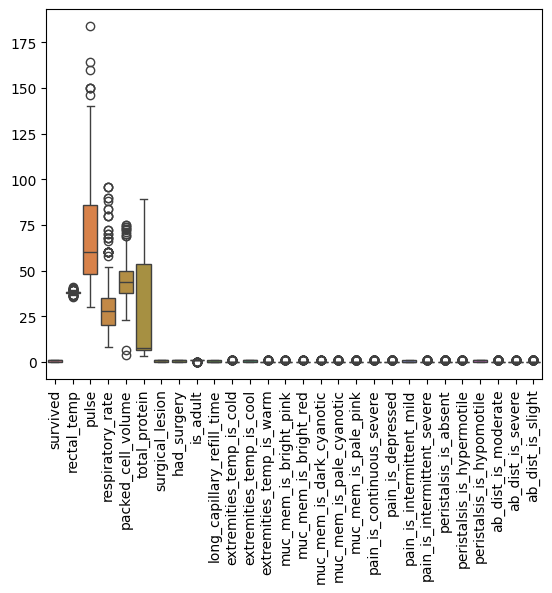

In [834]:
# Box plots to check for scale and outliers
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()

#### Feature scaling

There is a quite a bit of variance in the range of each features.  Our plan is to try a bunch of different models, including KNN, and logistic regression, which will benefit from having scaled features

In [835]:
# Preparing features and target
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

X_train = df_train.drop('survived', axis=1)
y_train = df_train['survived'] 

X_test = df_test.drop('survived', axis=1)
y_test = df_test['survived']

feature_columns = X_test.columns
boolean_cols = [col for col in feature_columns if X_test[col].dropna().value_counts().index.isin([0,1]).all()]
continuous_cols = [col for col in feature_columns if col not in boolean_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),  # Apply StandardScaler to continuous features
        ('cat', 'passthrough', boolean_cols)         # Pass through boolean features
    ])

X_train_scaled = pd.DataFrame(preprocessor.fit_transform(X_train), columns=feature_columns)
X_test_scaled = pd.DataFrame(preprocessor.transform(X_test), columns=feature_columns)

# Put resampled data back to a DataFrame
df_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
df_train_scaled.insert(0, 'survived', y_train.astype('bool'))

# Reassign bools back to bool type...
for col in boolean_cols:
    df_train_scaled[col] = df_train_scaled[col].astype(bool)
    X_train_scaled[col] = X_train_scaled[col].astype(bool)

X_train_scaled.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,had_surgery,is_adult,long_capillary_refill_time,extremities_temp_is_cold,extremities_temp_is_cool,extremities_temp_is_warm,muc_mem_is_bright_pink,muc_mem_is_bright_red,muc_mem_is_dark_cyanotic,muc_mem_is_pale_cyanotic,muc_mem_is_pale_pink,pain_is_continuous_severe,pain_is_depressed,pain_is_intermittent_mild,pain_is_intermittent_severe,peristalsis_is_absent,peristalsis_is_hypermotile,peristalsis_is_hypomotile,ab_dist_is_moderate,ab_dist_is_severe,ab_dist_is_slight
0,-0.069179,-0.674348,-0.387253,0.849179,-0.574443,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False
1,0.393425,1.240613,0.604658,0.949099,-0.537471,True,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True
2,1.935438,-0.600696,2.216512,-0.649614,-0.629902,True,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True
3,-0.223381,-0.379738,0.108703,0.449501,-0.592930,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
4,-0.994387,-0.821653,-0.387253,-0.249936,-0.629902,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


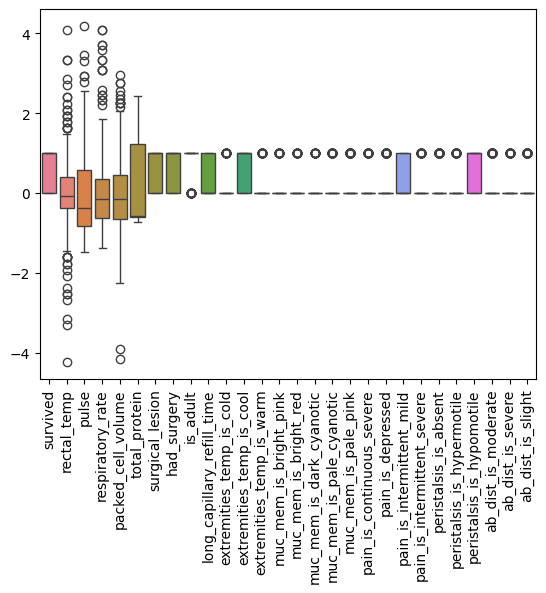

In [836]:
# Check features again after scaling

sns.boxplot(data=df_train_scaled)
plt.xticks(rotation=90)
plt.show()

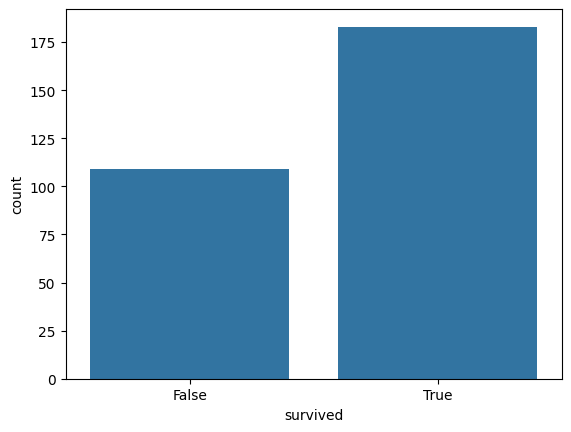

In [837]:
# Let's check how balanced our data is...

sns.countplot(x='survived', data=df_train)
plt.show()

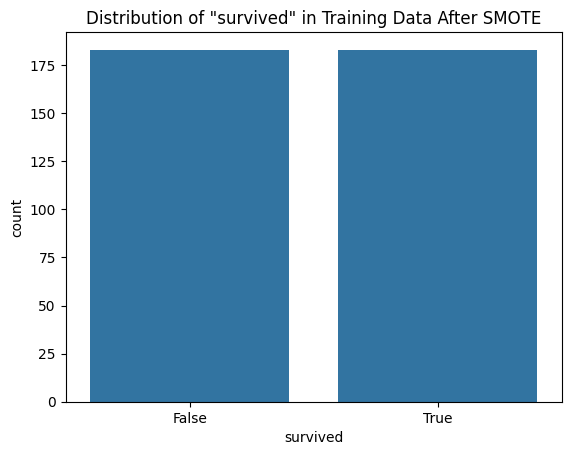

In [838]:
# The "true" cases seemed be in a very strong majority, and this might skew our models
# Let's use SMOTE to create a more even sampling, and scale our features

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Apply SMOTE to both our scaled and unscaled data
smote = SMOTE(random_state=1)
X_train_scaled_resampled, y_train_scaled_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)
X_train_unscaled_resampled, y_train_unscaled_resampled = smote.fit_resample(X_train, y_train_encoded)

# Convert resampled data back to a DataFrame
df_train_scaled_resampled = pd.DataFrame(X_train_scaled_resampled, columns=X_train.columns)
df_train_scaled_resampled.insert(0, 'survived', y_train_scaled_resampled.astype('bool'))

df_train_unscaled_resampled = pd.DataFrame(X_train_unscaled_resampled, columns=X_train.columns)
df_train_unscaled_resampled.insert(0, 'survived', y_train_unscaled_resampled.astype('bool'))

# Plot histogram of the 'survived' column in the resampled data
sns.countplot(x='survived', data=df_train_scaled_resampled)
plt.title('Distribution of "survived" in Training Data After SMOTE')
plt.show()

In [839]:
# This looks better!  Let's using this as our training set moving forward

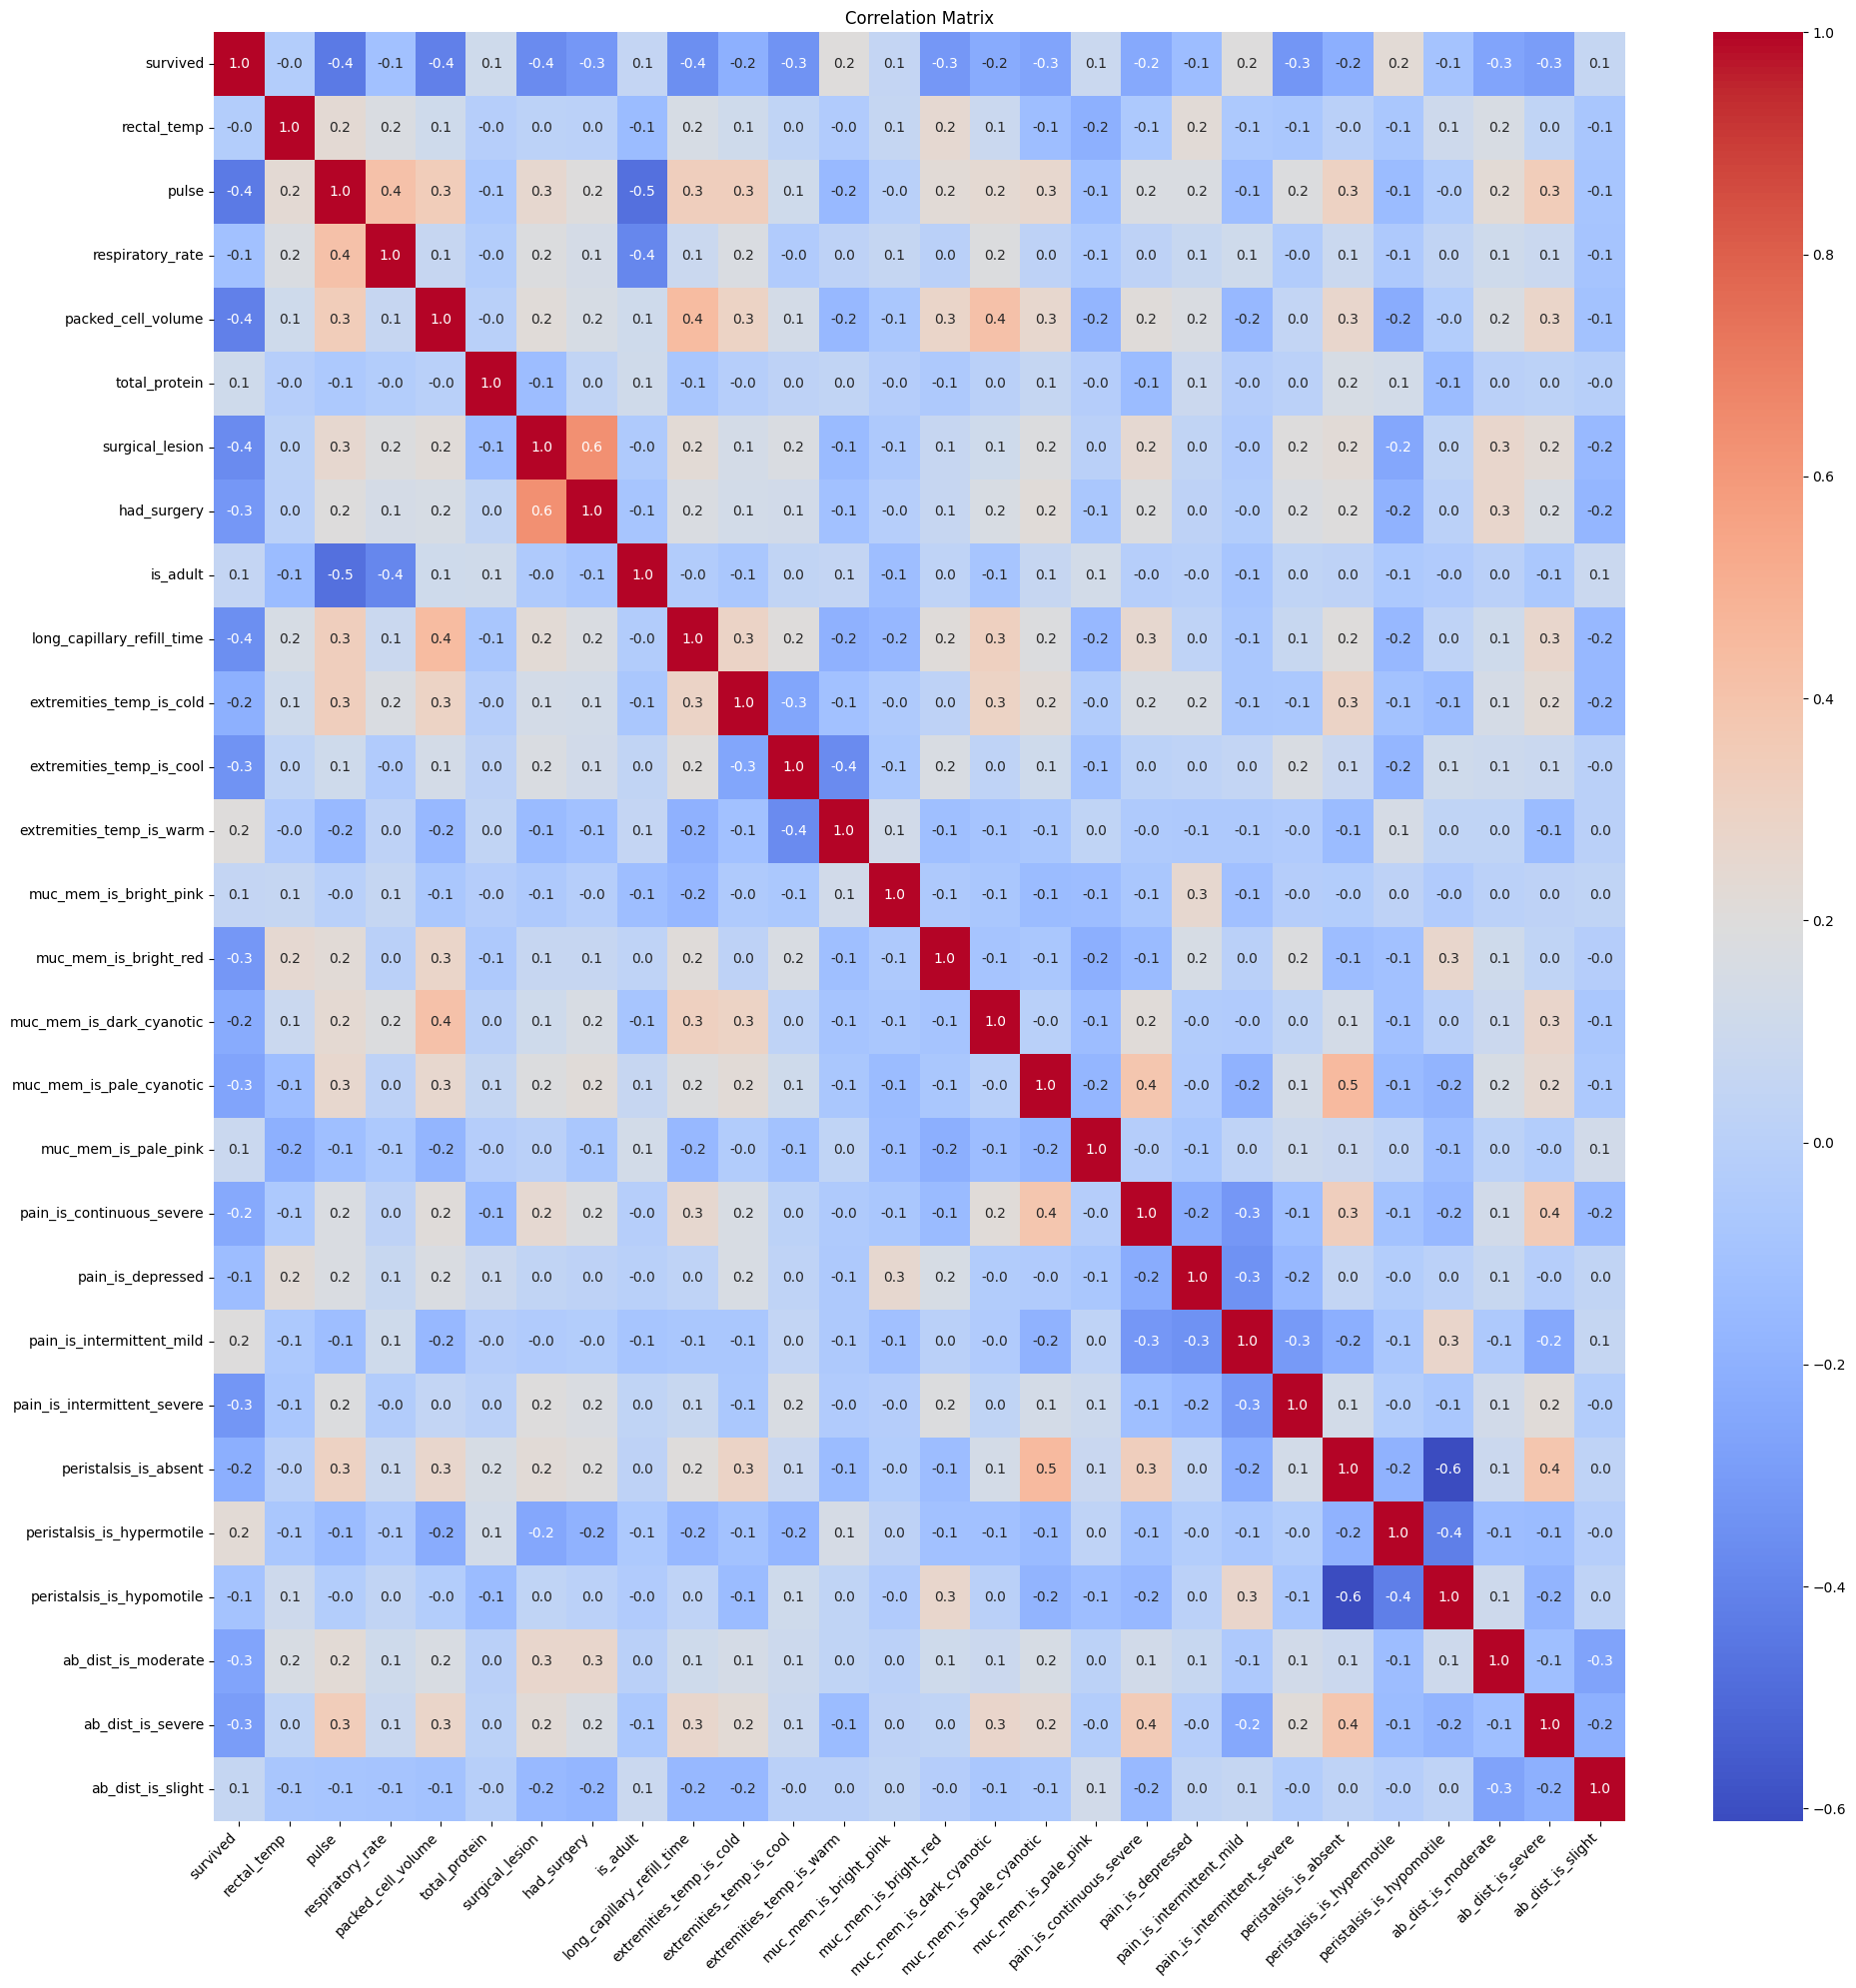

In [840]:
# Compute the correlation matrix
corr_matrix = df_train_scaled_resampled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', cbar=True,
            annot_kws={'size': 10})  # Increase font size for annotations

plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better fit
plt.yticks(rotation=0)  # Ensure y labels are horizontal for better readability
plt.tight_layout()  # Adjust the layout to make room for label rotation
plt.show()

There don't seem to any features that are very strongly correlated to our target of "survived," with the highest correlation being around -0.4.  For that reason, it seems hard to argue that we should remove any features at this point, as we may need to rely on the combined wisdom of many loosely correlated features, rather than just a handful of strong ones.

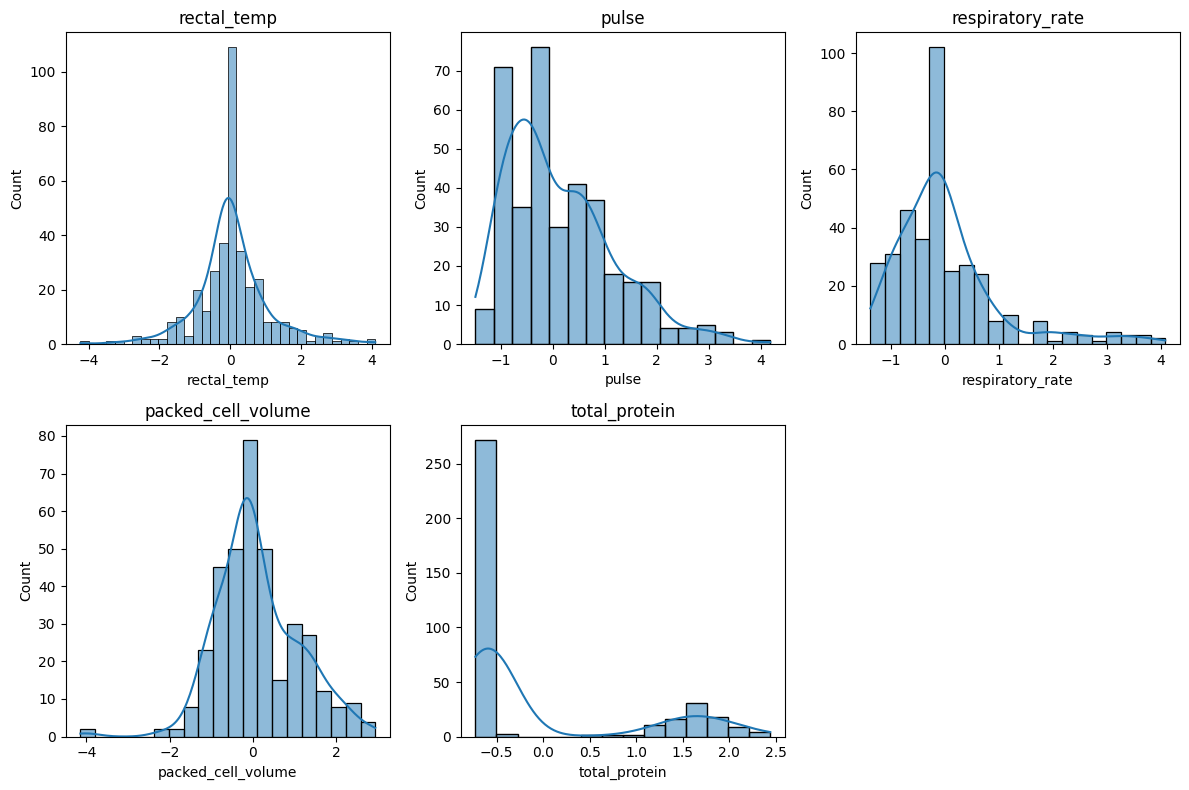

In [841]:
# Linear features distribution Histogram

# Number of rows/columns
n_rows = 2
n_cols = 3

# Set up the matplotlib figure
plt.figure(figsize=(n_cols * 4, n_rows * 4))

# Loop through the numerical columns
for index, column in enumerate(df_train_scaled_resampled.select_dtypes(exclude=['bool']).columns):
    plt.subplot(n_rows, n_cols, index + 1)
    sns.histplot(df_train_scaled_resampled[column], kde=True)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

Our linear numeric values seem mostly evenly distributed with no extreme outliers.  `total_protein`, has an interesting distribution.  It almost looks like we could classify this variable as a boolean, with values under/over 20, because of the valley in the feature distribution. And the two peaks on pulse is somewhat worrying. For the sake of simplicity, let's keep it as is for now.

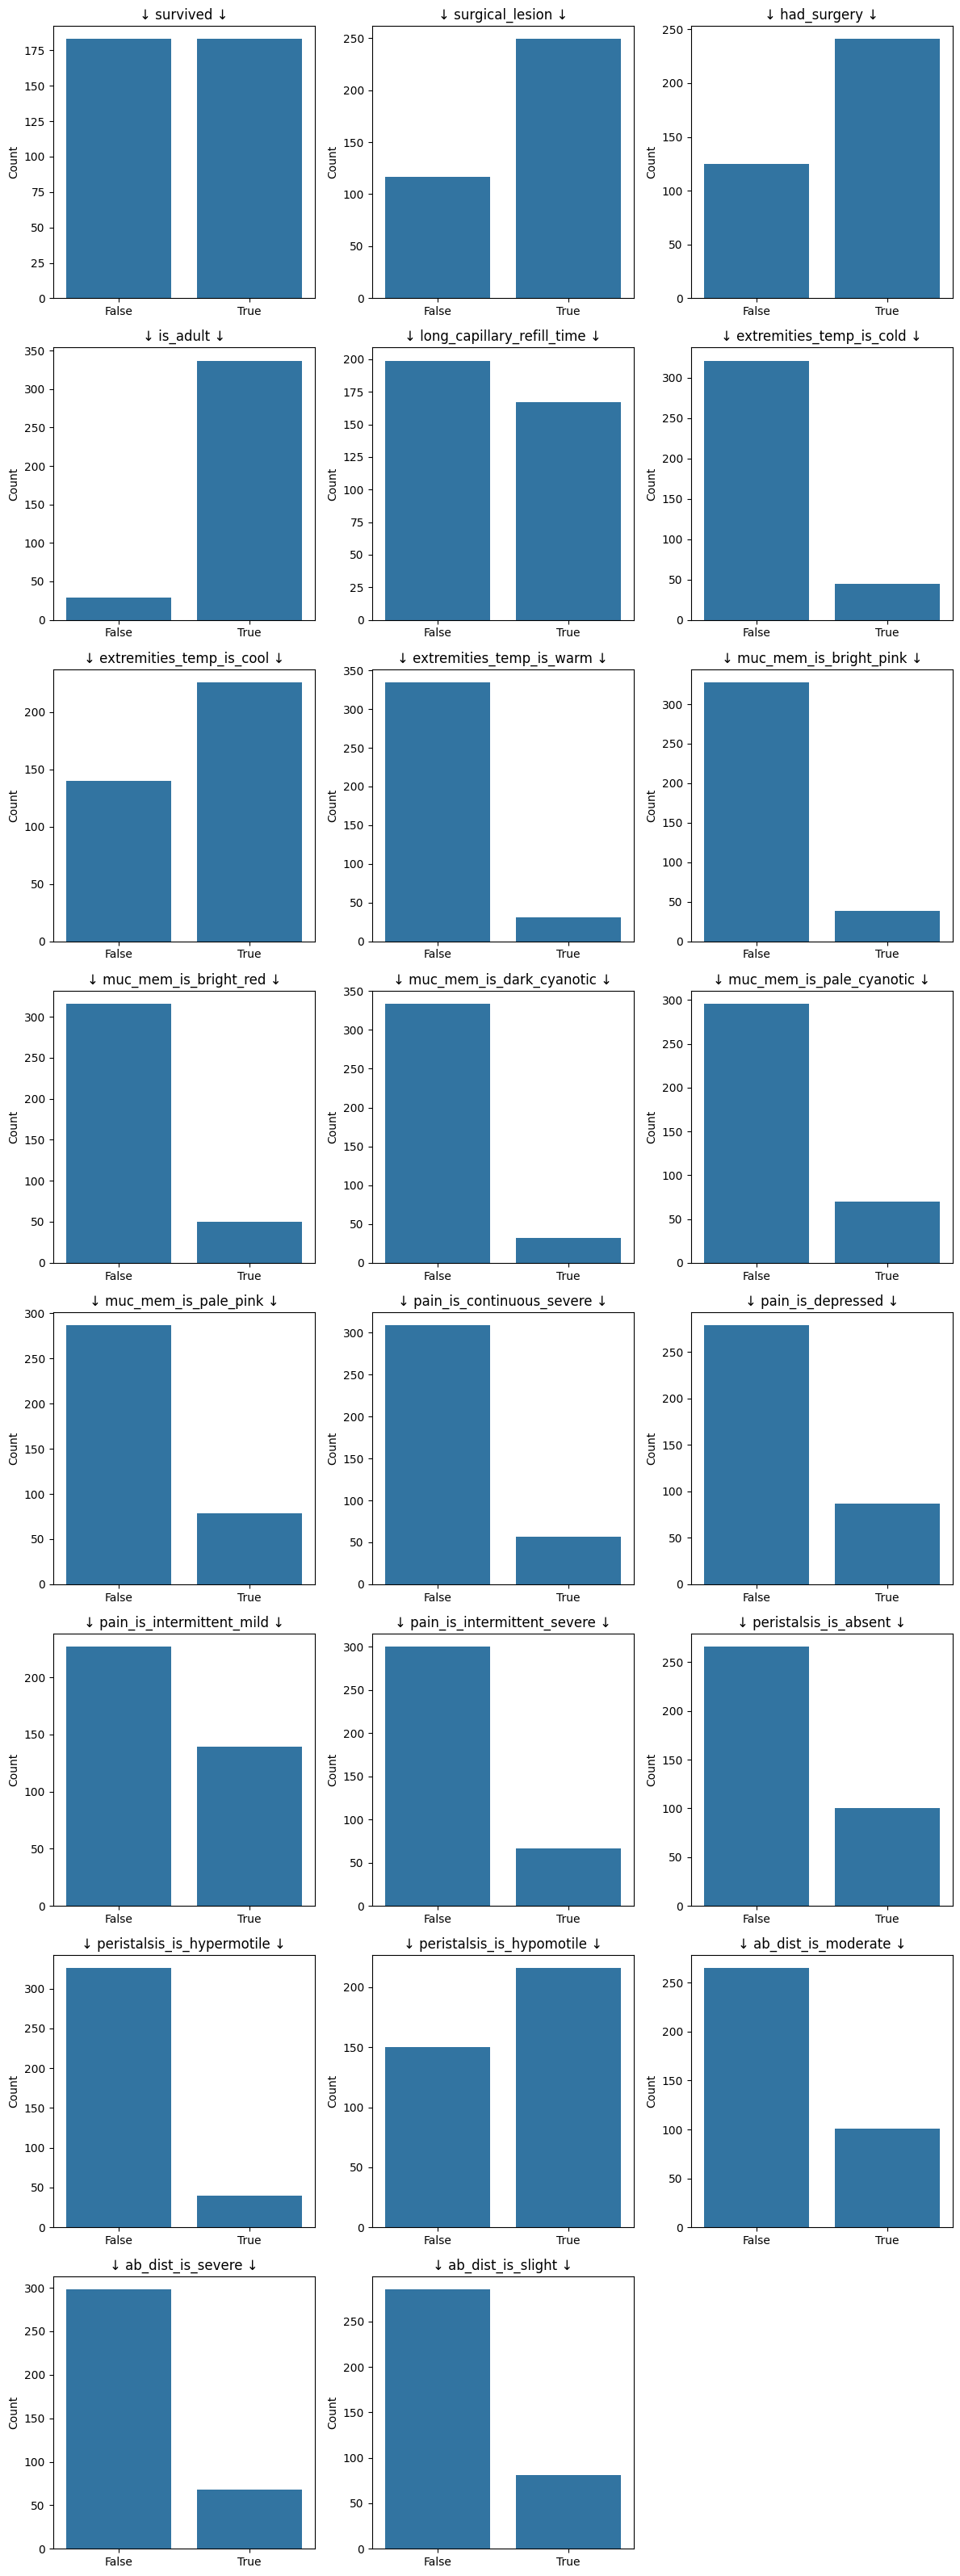

In [842]:
# Distribution of boolean values

# Determine the number of boolean columns
num_features = df_train_scaled_resampled.select_dtypes(include=['bool']).shape[1]

# Set up the grid
n_cols = 3  # Max columns per row
n_rows = (num_features + n_cols - 1) // n_cols  # Calculate rows needed, rounding up

# Create a figure and axes with a subplot for each boolean feature
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))  # Adjust figsize as necessary

# Flatten the axes array if more than one row and column
axes = axes.flatten()

# Loop through the boolean columns and create a histogram for each
for i, col in enumerate(df_train_scaled_resampled.select_dtypes(include=['bool']).columns):
    ax = axes[i]  # Get the appropriate subplot axis
    sns.countplot(x=df_train_scaled_resampled[col], ax=ax)  # Plot the countplot/histogram
    ax.set_title(f'↓ {col} ↓')  # Set the title for each histogram
    ax.set_xlabel('')  # Set x-axis label
    ax.set_ylabel('Count')  # Set y-axis label

# Hide any unused axes if the number of plots is less than the number of subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Some of our boolean values are unevenly distributed.  For example, all of the samples in `muc_mem_is_dark_cyonic` and `isAdult` are almost entirely one value.  However, being so lopsided, doesn't necessarily have an affect on the correlation.  Looking at the matrix, `isAdult` has a very weak correlation, while `muc_mem_is_dark_cyonic` is probably worth looking at.  There doesn't seem to be a reason to remove any boolean values at this stage.

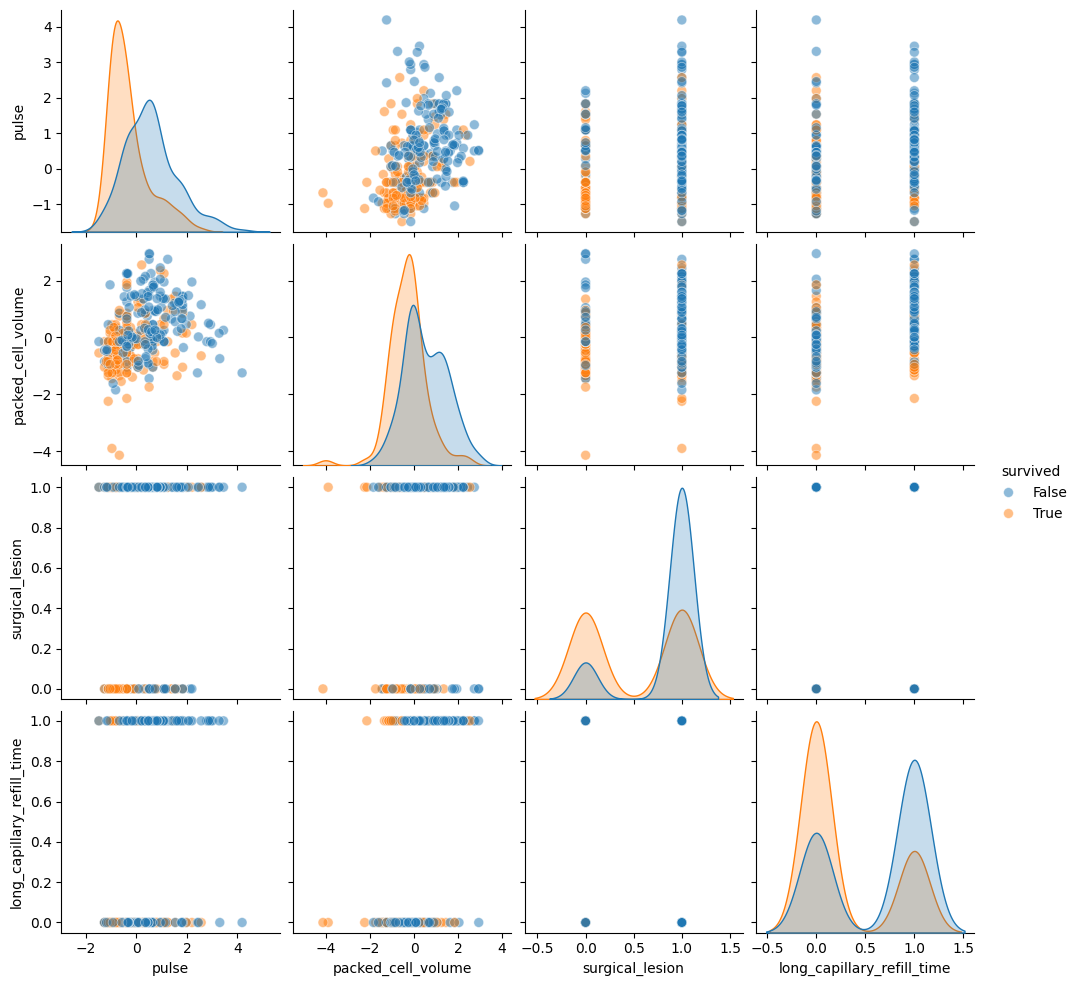

In [843]:
# Pair plot with highest correlated features

corr_matrix =  df_train_scaled_resampled.corr()
target_corr = corr_matrix['survived'].drop('survived') 
threshold = 0.35 # Update this value to get more/less features
high_corr_features = target_corr[abs(target_corr) > threshold].index.tolist()

# Add the target variable to the list for visualization
features_to_plot = high_corr_features + ['survived']

# Create a pair plot
sns.pairplot(df_train_scaled_resampled[features_to_plot], hue='survived', height=2.5, plot_kws={'alpha': 0.5, 's': 50})
plt.title('')
plt.show()



#### Feature interactions

In [844]:
# At first glance,there appearas to be a strong interaction between a few pairs of features based on the pair splot
#  where there seems to be a diagnol separation in `survived` cases.  Let's check some of these with logistic regression

df_train_scaled_resampled['survived'] = df_train_scaled_resampled['survived'].astype(int)

combo_string = '*'.join(high_corr_features)
model = smf.logit('survived ~ ' + combo_string, data=df_train_scaled_resampled).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.481596
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  366
Model:                          Logit   Df Residuals:                      350
Method:                           MLE   Df Model:                           15
Date:                Sun, 12 May 2024   Pseudo R-squ.:                  0.3052
Time:                        18:57:00   Log-Likelihood:                -176.26
converged:                       True   LL-Null:                       -253.69
Covariance Type:            nonrobust   LLR p-value:                 2.611e-25
=======================================================================================================================================================
                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                               1.2315      0.412      2.991      0.003       0.425       2.038
surgical_lesion[T.True]                                                                -1.2653      0.462     -2.737      0.006      -2.171      -0.359
long_capillary_refill_time[T.True]                                                     -0.6919      0.603     -1.147      0.251      -1.874       0.491
surgical_lesion[T.True]:long_capillary_refill_time[T.True]                              0.2377      0.688      0.346      0.730      -1.110       1.586
pulse                                                                                  -1.8307      0.573     -3.196      0.001      -2.953      -0.708
pulse:surgical_lesion[T.True]                                                           1.4550      0.621      2.343      0.019       0.238       2.672
pulse:long_capillary_refill_time[T.True]                                                1.3390      0.706      1.896      0.058      -0.045       2.723
pulse:surgical_lesion[T.True]:long_capillary_refill_time[T.True]                       -1.6793      0.801     -2.098      0.036      -3.248      -0.110
packed_cell_volume                                                                     -1.0269      0.537     -1.912      0.056      -2.079       0.026
packed_cell_volume:surgical_lesion[T.True]                                              0.8118      0.608      1.335      0.182      -0.380       2.004
packed_cell_volume:long_capillary_refill_time[T.True]                                   0.1049      0.770      0.136      0.892      -1.403       1.613
packed_cell_volume:surgical_lesion[T.True]:long_capillary_refill_time[T.True]          -0.6388      0.867     -0.737      0.461      -2.338       1.060
pulse:packed_cell_volume                                                               -0.1509      0.686     -0.220      0.826      -1.495       1.193
pulse:packed_cell_volume:surgical_lesion[T.True]                                        0.7399      0.767      0.964      0.335      -0.764       2.244
pulse:packed_cell_volume:long_capillary_refill_time[T.True]                             0.1184      0.855      0.139      0.890      -1.557       1.793
pulse:packed_cell_volume:surgical_lesion[T.True]:long_capillary_refill_time[T.True]    -0.7172      0.988     -0.726      0.468      -2.653       1.219
=======================================================================================================================================================
"""

This might be a naive approach, as this model is almost certainly too complex, but let's look at some of the promising combinations based on their p-scores, namely...
- pulse:surgical_lesion[T.True]
- pulse:surgical_lesion[T.True]:long_capillary_refill_time[T.True]

In [845]:
model = smf.logit('survived ~ pulse*surgical_lesion', data=df_train_scaled_resampled).fit()
print('\n ~ pulse*surgical_lesion pseudo r-squared', model.prsquared, '\n')

model = smf.logit('survived ~ pulse+surgical_lesion', data=df_train_scaled_resampled).fit()
print('\n ~ pulse*surgical_lesion pseudo r-squared', model.prsquared)

model = smf.logit('survived ~ pulse*surgical_lesion*long_capillary_refill_time', data=df_train_scaled_resampled).fit()
print('\n ~ pulse*surgical_lesion*long_capillary_refill_time', model.prsquared)

model = smf.logit('survived ~ pulse+surgical_lesion+long_capillary_refill_time', data=df_train_scaled_resampled).fit()
print('\n ~ pulse+surgical_lesion+long_capillary_refill_time', model.prsquared)

Optimization terminated successfully.
         Current function value: 0.538831
         Iterations 6

 ~ pulse*surgical_lesion pseudo r-squared 0.2226315587811516 

Optimization terminated successfully.
         Current function value: 0.542579
         Iterations 6

 ~ pulse*surgical_lesion pseudo r-squared 0.21722348711947825
Optimization terminated successfully.
         Current function value: 0.513069
         Iterations 7

 ~ pulse*surgical_lesion*long_capillary_refill_time 0.25979849615679995
Optimization terminated successfully.
         Current function value: 0.523647
         Iterations 6

 ~ pulse+surgical_lesion+long_capillary_refill_time 0.2445376760084862


Adding interactions has a negligible impact on r-squared when compared to models without interactions.  Without going through the entire dataset and comparing every pair of features, let's assume that Occam's razor prevails, ignore feature interactions, and move on

#### Model Creation

At this point, we are relatively confident that our data is clean, imputed, scaled, balanced, and requires no additional interaction features, we can start to train our models

In [846]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


log_reg = LogisticRegression(random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(random_state=1)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=1)
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)

# Train Logistic Regression
log_reg.fit(X_train_scaled_resampled, y_train_scaled_resampled)

# Train k-NN
knn.fit(X_train_scaled_resampled, y_train_scaled_resampled)

# Train Decision Tree
decision_tree.fit(X_train_unscaled_resampled, y_train_unscaled_resampled)  # No need to scale data for decision trees

# AdaBoost
adaboost.fit(X_train_unscaled_resampled, y_train_unscaled_resampled)

# Random Forest
random_forest.fit(X_train_unscaled_resampled, y_train_unscaled_resampled)

models = [log_reg, knn, decision_tree, adaboost, random_forest]
model_names = ["Logistic Regression", "K-Nearest Neighbors", "Decision Tree", "AdaBoost", "Random Forest"]

# Evaluate each model
for model, name in zip(models, model_names):
    if name == "Decision Tree":
        y_pred = model.predict(X_test)  # Decision trees use non-scaled data
    else:
        y_pred = model.predict(X_test_scaled)  # Other models use scaled data

    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"{name} Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"{name} F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(f"{name} ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]):.2f}\n")




Logistic Regression Accuracy: 0.64
Logistic Regression Precision: 0.65
Logistic Regression Recall: 0.76
Logistic Regression F1 Score: 0.70
Logistic Regression ROC-AUC: 0.72

K-Nearest Neighbors Accuracy: 0.69
K-Nearest Neighbors Precision: 0.71
K-Nearest Neighbors Recall: 0.76
K-Nearest Neighbors F1 Score: 0.74
K-Nearest Neighbors ROC-AUC: 0.73

Decision Tree Accuracy: 0.69
Decision Tree Precision: 0.67
Decision Tree Recall: 0.88
Decision Tree F1 Score: 0.76
Decision Tree ROC-AUC: 0.60

AdaBoost Accuracy: 0.62
AdaBoost Precision: 0.69
AdaBoost Recall: 0.60
AdaBoost F1 Score: 0.64
AdaBoost ROC-AUC: 0.70

Random Forest Accuracy: 0.61
Random Forest Precision: 0.60
Random Forest Recall: 0.93
Random Forest F1 Score: 0.73
Random Forest ROC-AUC: 0.76



### Results, hyperparameters, and optimizations

KNN seems to be our best performing model.  Let's see if we can improve it by updating our K value.

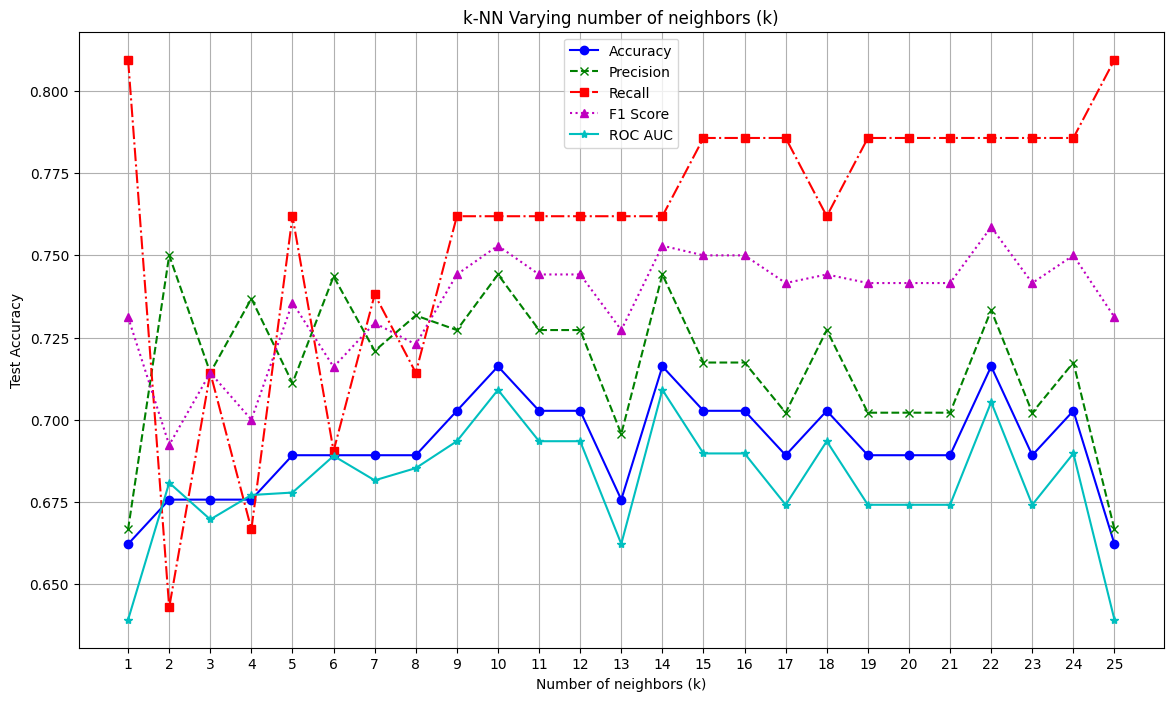

In [847]:
# Range of `k` to test
k_values = range(1, 26)
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

for k in k_values:
    # Initialize the kNN classifier with the current value of `k`
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(X_train_scaled_resampled, y_train_scaled_resampled)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 =f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    roc_aucs.append(roc_auc)


plt.figure(figsize=(14, 8))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(k_values, precisions, marker='x', linestyle='--', color='g', label='Precision')
plt.plot(k_values, recalls, marker='s', linestyle='-.', color='r', label='Recall')
plt.plot(k_values, f1s, marker='^', linestyle=':', color='m', label='F1 Score')
plt.plot(k_values, roc_aucs, marker='*', linestyle='-', color='c', label='ROC AUC')
plt.title('k-NN Varying number of neighbors (k)')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.legend()
plt.show()

In [848]:
# It appears that k=10 neighbors is the sweet spot.  After that, all of our metrics seem to decline.

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_scaled_resampled, y_train_scaled_resampled)
y_pred = knn.predict(X_test_scaled) 

print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"{name} Precision: {precision_score(y_test, y_pred):.2f}")
print(f"{name} Recall: {recall_score(y_test, y_pred):.2f}")
print(f"{name} F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"{name} ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]):.2f}\n")

Random Forest Accuracy: 0.72
Random Forest Precision: 0.74
Random Forest Recall: 0.76
Random Forest F1 Score: 0.75
Random Forest ROC-AUC: 0.76



### Cross-validation

To make sure that our model performs well with different sample sets, let's do some cross-validation to check our accuracy

In [849]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X_train_scaled_resampled, y_train_scaled_resampled, cv=10, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracies for each fold are:", scores)
print("Average cross-validation score: %.2f" % scores.mean())
print("Standard deviation of cross-validation score: %.2f" % scores.std())

Accuracies for each fold are: [0.83783784 0.83783784 0.83783784 0.7027027  0.75675676 0.75675676
 0.91666667 0.88888889 0.77777778 0.80555556]
Average cross-validation score: 0.81
Standard deviation of cross-validation score: 0.06


#### Discussion and Conclusion

A substantial amount of time was dedicated to data cleaning, which was unsurprising based on what I've heard.  This seems to be where some of the biggest gains in accuracy can be made though.  It's very surprising how poorly documented most publically available data is.  Many of the decisions that were made in this project required a careful and thoughtful analysis of each field and how they should be interpreted.  It would be tempting to just throw the data into a model and hope for the best, but I doubt we would have been as successful if we had done that. A lot of information was lost from lesion_type1,2,3 being improperly documented.  This data might still be interpretable beyond our simple boolean conversion.

As a result of our careful cleanup, an accuracy of around 80% was achievable with a relatively small dataset.  This seems high, which leads me to be somewhat skeptical, but our cross-validation implies that the model is suitable for multiple sample-sets.

A sizeable improvement was possible by both comparing multiple models, and then tweaking k in KNN once we decided on that direction.  To be fair, we could have also done more hyperparameter optimizations on the other models, and may have been able to achieve an even higher accuracy.  

The question, from a practical perspective is, could this model be used in a real world scenario, and would it be even useful.  If a vet is trying to predict the survival chances of a horse, are all of these datapoints available at the time of analysis?  After all, "was surgery performed" is a retrospective datapoint, so our ability to predict outcomes would likely not be as good as we see here.

Still, this was an interesting exercise, with results that turned out better than I expected, given the data quality.